## Connect to drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import cv2
from PIL import Image
import glob as gb
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
sns.set(rc={'figure.figsize':(15,10)})

## get data from drive and append into list

In [13]:
x = []
y = []

In [14]:
class_label = 0
test = '/gdrive/My Drive/Rock-Paper-Scissors new/train/'
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str( test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
    class_label = class_label + 1

scissors
paper
rock


In [15]:
class_label = 0
test = "/gdrive/My Drive/Rock-Paper-Scissors new/test/"
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str( test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
    class_label = class_label + 1

paper
scissors
rock


## Convert to numpy array

In [17]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2892, 227, 227)
(2892,)


# Scale

In [18]:
x = x/255

In [19]:
y

array([0, 0, 0, ..., 2, 2, 2])

## Split data

In [20]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# apply dummy to y_train 

In [21]:
y_train = np_utils.to_categorical(y_train)

In [22]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Model architecture

In [23]:
model = models.Sequential()

model.add(Input(shape=(227, 227, 1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(3, activation = "softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(x_train,y_train, batch_size= 10, epochs = 30)

Epoch 1/30
203/203 [==============================] - 15s 23ms/step - loss: 0.5545 - accuracy: 0.8646
Epoch 2/30
203/203 [==============================] - 5s 23ms/step - loss: 0.1017 - accuracy: 0.9699
Epoch 3/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0797 - accuracy: 0.9807
Epoch 4/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0664 - accuracy: 0.9817
Epoch 5/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0366 - accuracy: 0.9891
Epoch 6/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0400 - accuracy: 0.9911
Epoch 7/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0445 - accuracy: 0.9901
Epoch 8/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0161 - accuracy: 0.9926
Epoch 9/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0227 - accuracy: 0.9936
Epoch 10/30
203/203 [==============================] - 5s 23ms/step - loss: 0.0480 - accur

# Evaluate data

## loss and accuracy plot

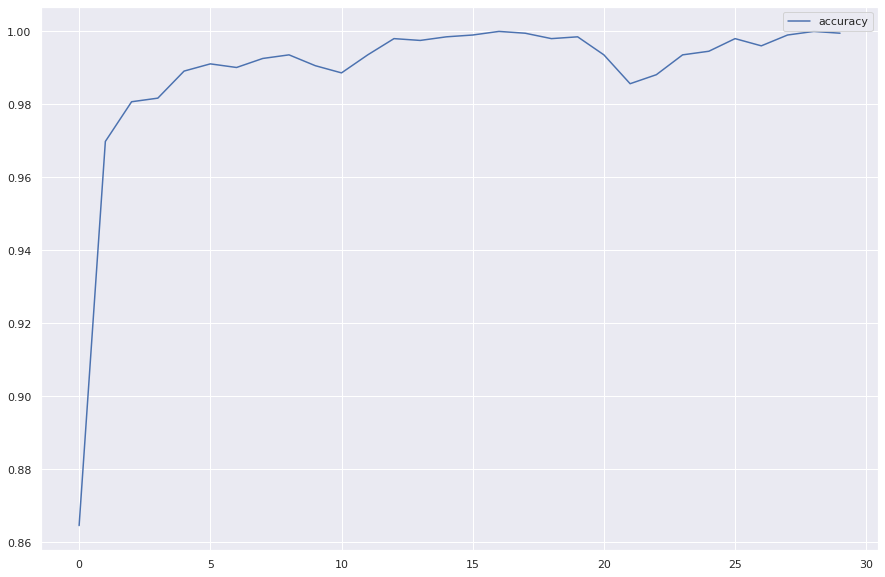

In [25]:
#plot the accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='accuracy')
plt.legend();

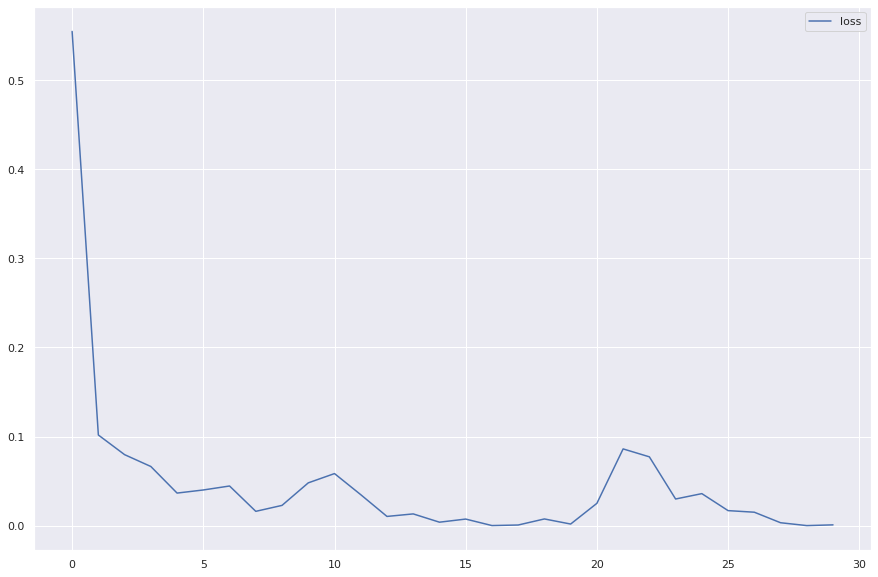

In [26]:
#plot the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.legend()

## Check evalute in train and test data

In [27]:
# Train
loss, acc = model.evaluate(x_train, y_train)
print('Train')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

64/64 [==============================] - 2s 30ms/step - loss: 2.9230e-07 - accuracy: 1.0000
Train
loss : 2.922998589838244e-07
acc : 100.0


In [28]:
# Test
loss, acc = model.evaluate(xtest, np_utils.to_categorical(ytest))
print('Test')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

28/28 [==============================] - 1s 29ms/step - loss: 0.0487 - accuracy: 0.9954
Test
loss : 0.04873378947377205
acc : 99.53917264938354


In [29]:
pred = model.predict(xtest)
pred

array([[1.0000000e+00, 1.2135808e-33, 6.7512520e-32],
       [1.0000000e+00, 1.1692270e-35, 0.0000000e+00],
       [1.0000000e+00, 2.2152987e-30, 8.9857756e-33],
       ...,
       [6.0701518e-21, 6.2324299e-13, 1.0000000e+00],
       [1.7155106e-08, 2.8388224e-13, 1.0000000e+00],
       [1.0000000e+00, 9.2464425e-16, 7.7363828e-27]], dtype=float32)

In [30]:
prediction = np.argmax(pred, axis=-1)
prediction

array([0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1,

## Confusion matrix

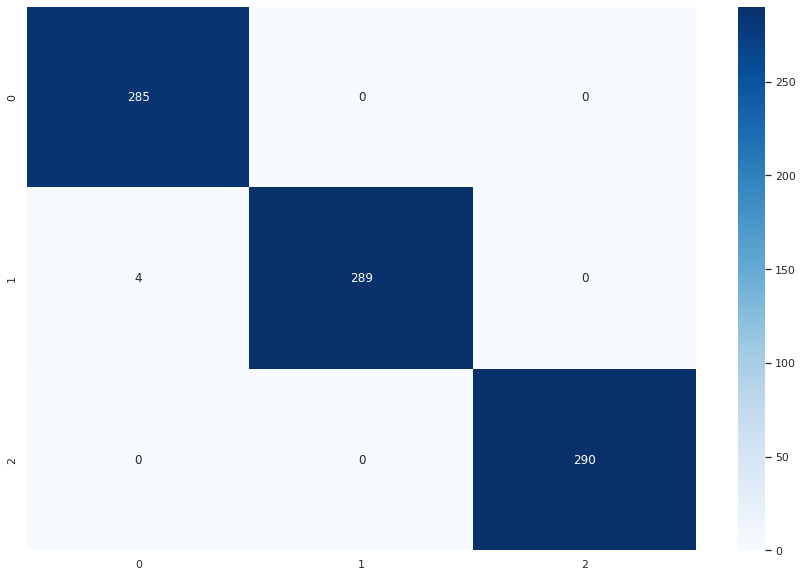

In [31]:
sns.heatmap(confusion_matrix(prediction, ytest), annot=True, fmt='1', cmap='Blues');

## Recall and Precision

In [32]:
print('Model Recall score  : {0:0.4f}'. format(recall_score(ytest, prediction,average='weighted')))
print('Model Precision  : {0:0.4f}'. format(precision_score(ytest, prediction,average='weighted')))

Model Recall score  : 0.9954
Model Precision  : 0.9955


In [33]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       289
           1       0.99      1.00      0.99       289
           2       1.00      1.00      1.00       290

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

